# $$Elaborato$$ $$d'esame$$
## $Introduzione$

## $Obiettivo$






# $Spiegazione$ $ed$ $illustrazione$ $del$ $codice$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Per raggiunger il fine sopra menzionato è stato scritto un programma in linguaggio python.}$
$\text{Il codice verrà illustrato nel modo seguente: sopra ogni cella contenente un blocco di codice, sarà  presente}$
$\text{una breve spiegazione del suo ruolo e della struttura, per differenziare le discussioni dei risultati dalle}$
$\text{spiegazioni del codice, queste ultime verrano evidenziate nei box gialli. Inoltre all'interno del codice saranno }$
$\text{presenti ulteriori commenti.}$


</p>
</div>



### $Primo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Vengono importati i moduli necessari per la costruzione di tutto il programma. Successivamente viene}$
$\text{semplicemente letto il file catalog.csv, contenente i dati del primo release di eRosita. In seguito, vengono }$ 
$\text{salvate le colonne contenenti: le misure di redshift, della massa e dell'offset. I dati vengono salvati }$
$\text{come series panda.}$

</p>
</div>


In [81]:
#importo tutti i moduli utili per il codice seguente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Letura dei dati
file_path = "catalog.csv"
df = pd.read_csv(file_path)

#Selezino le colonne relative ai dati di interesse 
z = df["BEST_Z"]
logM = df["logM500"]
offset = df["BCG_offset_R500"]

### $Secondo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Questa parte del programma plotta gli istogrammi dei diversi valori d'interesse. Viene infatti impostata una }$
$\text{figura che mi consente di plottare i tre grafici uno affianco all'altro e poi uso la funzione .hist di }$ 
    $\text{matplotlib per creare gli istogrammi. }$
$\text{Vogliamo poi calcolare i valori di massimo e minimo, deviazione standard, medie e quartili.}$
$\text{Questo viene fatto sfruttando la funzione .describe di seaborn, che restituisce una series di pandas. }$
    $\text{Per la presentazione grafica relativamente estetica viene usato del codice HTML. Tutto cio viene}$
    $\text{incluso direttamente in una funzione che poi può essere direttamente applicata alle series dei valori da}$
    $\text{analizzare. Dopo aver creato le tabelle, sempre con codice HTML, queste vengono affiancate }$
    $\text{semplicemente per motivi estetici.}$

</p>
</div>

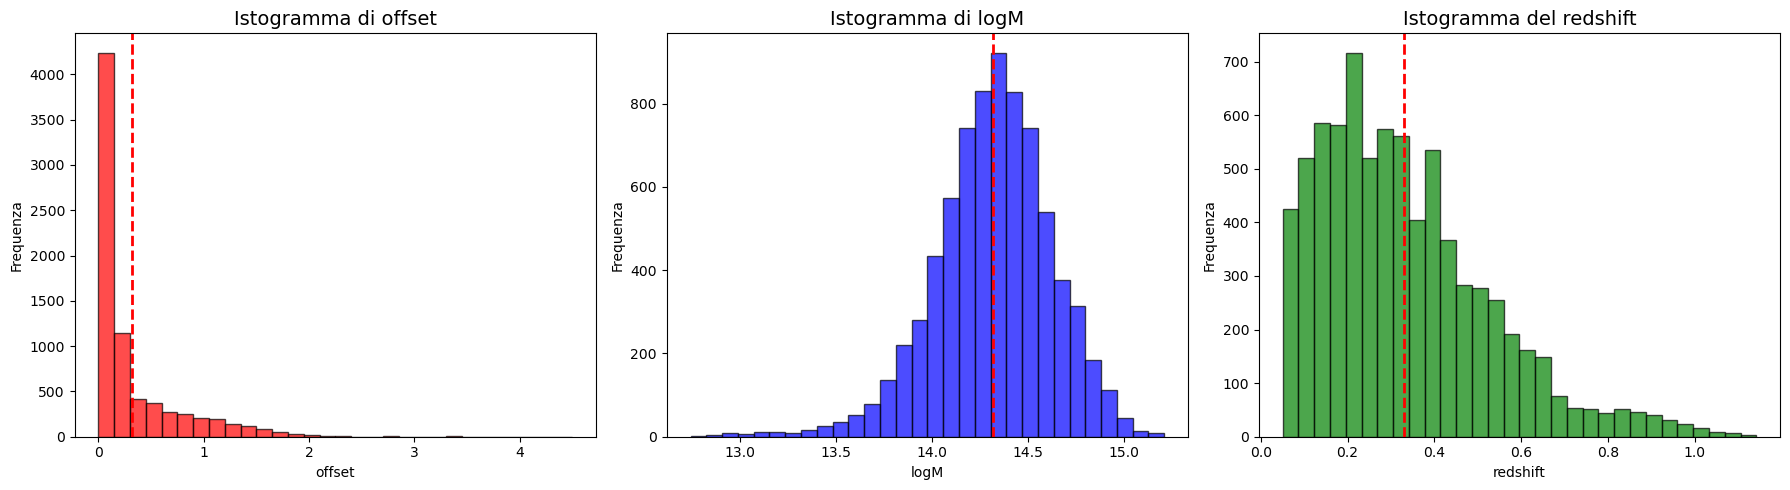

,Statistiche
count,7567.000
mean,0.317
std,0.440
min,0.001
25%,0.048
50%,0.121
75%,0.399
max,4.498
,Statistiche
count,7567.000


In [82]:
#voglio valutare la distribuzione di ogni valore
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #per plottare le tre distribuzioni una affianco all'altra

# Istogramma dell'offset 
axes[0].hist(offset, bins=30, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title("Istogramma di offset", fontsize=14)
axes[0].set_xlabel("offset")
axes[0].set_ylabel("Frequenza")
axes[0].axvline(x=0.317, color='red', linestyle='--', linewidth=2)

# Istogramma di logM 
axes[1].hist(logM, bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Istogramma di logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("Frequenza")
axes[1].axvline(x=14.315, color='red', linestyle='--', linewidth=2)


# Istogramma di redshift
axes[2].hist(z, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title("Istogramma del redshift", fontsize=14)
axes[2].set_xlabel("redshift")
axes[2].set_ylabel("Frequenza")
axes[2].axvline(x=0.331, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

from IPython.display import HTML # importo il modulo solamente per una presentazione grafica migliore

def make_styled_table(series, title): #definisco funzione che usa la funzione .describe per calcolare 
                                      #valori statistici come var. mean, quartili ecc. 
                                      #e poi restituisce una tabella HTML stilizzata contenente tali valori
    
    return (
        series.describe().to_frame("Statistiche")
        .style.format("{:.3f}")
        .set_caption(title)
        .set_table_styles([
            {"selector": "caption",
             "props": "font-size:16px; font-weight:bold; text-align:left; padding:8px;"},

            {"selector": "th",
             "props": "background:#323232; color:white; padding:8px;"},

            {"selector": "td",
             "props": "padding:8px; border-bottom:1px solid #DDD;"},
        ])
        .to_html()
    )


# Creazione delle tabelle
table_offset = make_styled_table(offset, "Statistiche di offset")
table_logM   = make_styled_table(logM,   "Statistiche di logM")
table_z      = make_styled_table(z,      "Statistiche di redshift")

# HTML per metterle affiancate
html = f"""
<div style="display:flex; gap:100px;">

    <div style="flex:1;">
        {table_offset}
    </div>

    <div style="flex:1;">
        {table_logM}
    </div>

    <div style="flex:1;">
        {table_z}
    </div>

</div>
"""

HTML(html)

In [83]:
mask = offset >= 2.0 # definisco una mask per filtrare i punti con offset "alto"
new_offset = offset[mask]
print(len(new_offset))

43


### $Distribuzione$ $dei$ $dati$

<div style="">
<p>
$\text{Gli istogrammi presentati hanno il fine di fornirci solamente un ideaa qualitativa di come sono distribuiti}$
$\text{i campioni. Osserviamo che i valori di offset sono molto concentrati "vicino" lo zero, infatti il 75%}$
$\text{del campione ha un offset misurato minore di 0,399 e solo 43 campioni hanno un offset misurato > 2.}$
$\text{Per la distribuzione di logM notiamo ???}$
$\text{}$
</p>
</div>

### $Terzo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{L'obiettivo di questa parte è plottare gli scatter per mostrare la distribuzione dell'offset in funzione}$
$\text{di LogM e redshift. Utilizzando quindi del codice analogo al blocco precedente e sostituendo .hist con .scatter,}$
$\text{ vado plottare tre grafici:                                                                                   }$
    
$\text{-Il primo mostra l'offset in funzione sia di logM che del redshift, dove la  
      "dimensione"dell'offset viene}$
$\text{espressa dalla scala di colori "turbo"                                                                         }$
    
$\text{-Il secondo mostra i punti offset vs logM                                                              }$

$\text{-Il terzo mostra i punti offset vs redshift}$

$\text{Poi, per poter vedere meglio i punti con offset relativamente alto, vengono eseguiti gli stessi plot ma}$
$\text{solo per punti con offset > 2. Per filtrare i campioni viene definita una mask. Sfruttando una funzionalità}$
$\text{del modulo pandas posso creare una series contenente solo due elementi: true o false. }$
$\text{La mask viene creata ponenedo un criterio come apunto: mask=offset>=2                                    }$
$\text{Con questo criterio viene quindi creata una series con la stessa shape di offset ma con elemento true}$
$\text{se in quella posizione il valore di offset soddisfa il criterio o, in caso contrario, false. Una volta }$
$\text{ottenuta la mask posso usare offset[mask] per creare una nuova serie con i valori "filtrati" in base al }$
$\text{mio criterio.}$
</div>

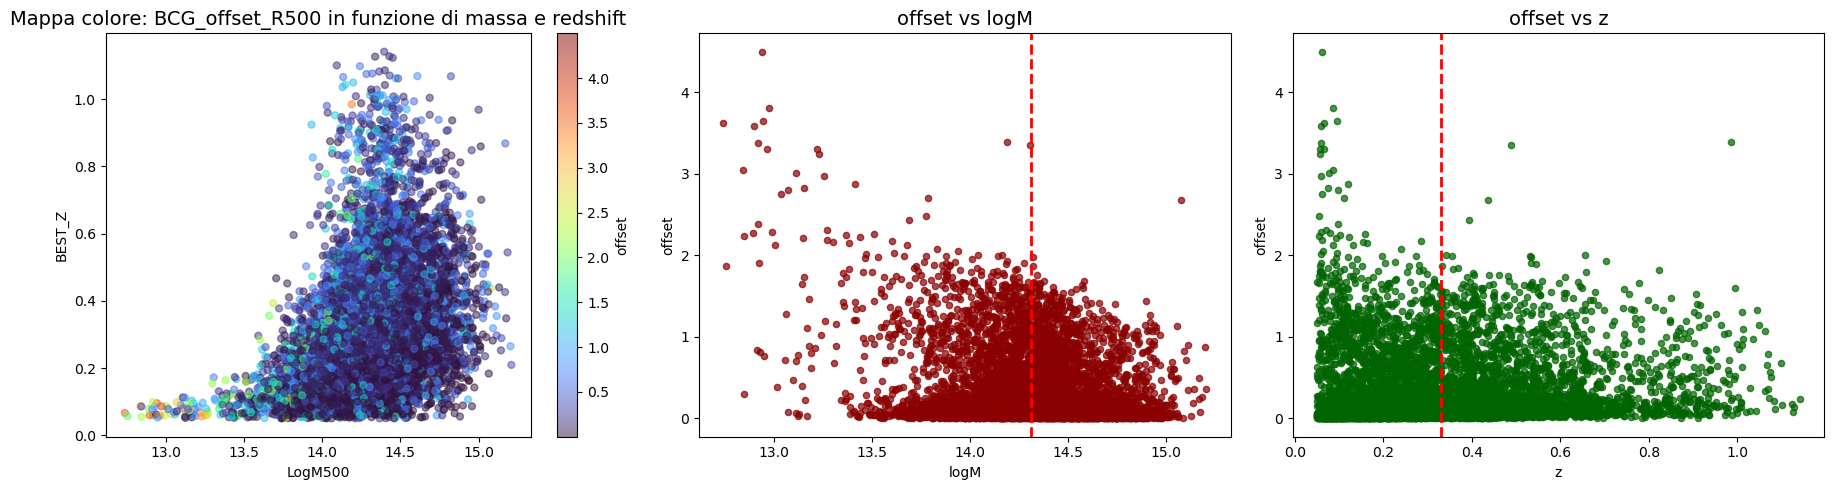

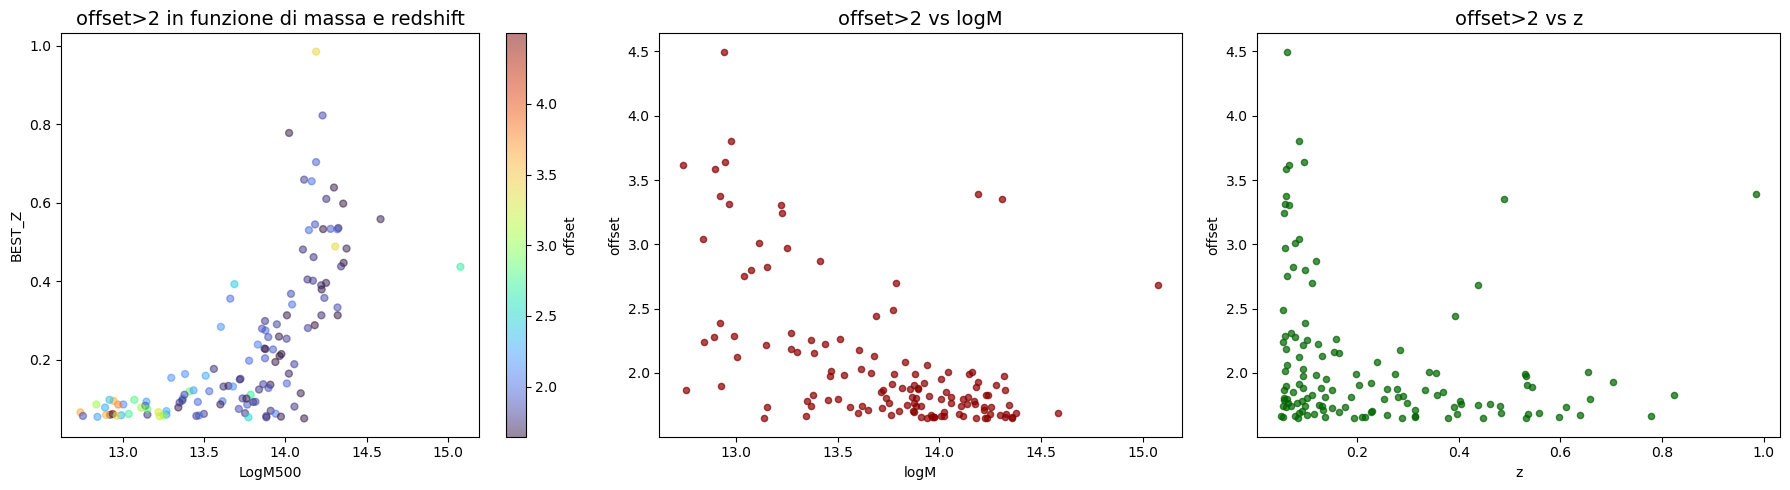

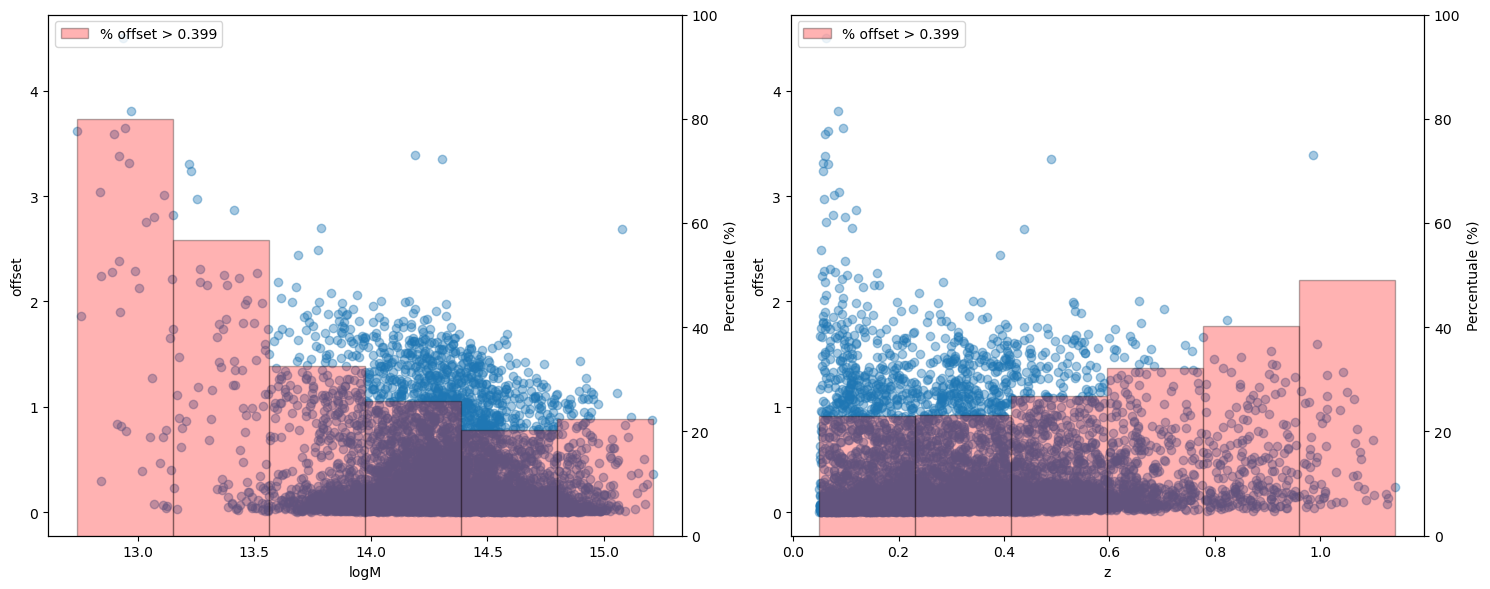

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # sempre per ottenere i plot affiancati

#ora faccio lo scatter plot per valutare la distribuzione dell'offset in funzione di logM e z
# offset vs massa e redshift
sc = axes[0].scatter(logM, z,c=offset,cmap="turbo",s=25,alpha=0.5)
axes[0].set_title("Mappa colore: BCG_offset_R500 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")


# Scatter plot dell'offset vs logM 
axes[1].scatter(logM, offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")
axes[1].axvline(x=14.315, color='red', linestyle='--', linewidth=2)

# Scatter plot dell'offset vs z 
axes[2].scatter(z, offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")
axes[2].axvline(x=0.331, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

mask = offset >= 1.640 # definisco una mask per filtrare i punti con offset "alto"
new_offset = offset[mask]
new_logM   = logM[mask]
new_z      = z[mask]

#eseguo i plot dei dati "filtrati"
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Scatter plot dell'offset vs LogM e z
sc = axes[0].scatter(new_logM, new_z,c=new_offset,cmap="turbo",s=25,alpha=0.5)

axes[0].set_title("offset>2 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")

# aggiungi la colorbar
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")

# Scatter plot dell'offset vs logM 
axes[1].scatter(new_logM, new_offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset>2 vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")

# Scatter plot dell'offset vs z 
axes[2].scatter(new_z, new_offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset>2 vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")


plt.tight_layout()
plt.show()


# --- Parametri ---
a = 0.399       # soglia su offset
logM_min = logM.min()
logM_max = logM.max()

def bins_width(data, nbins):
    max_data = data.max()
    min_data = data.min()
    width = (max_data-min_data)/nbins
    return width


wbinM = bins_width(logM,6.0)    # larghezza bin per logM
wbinZ = bins_width(z,6.0)        # larghezza bin per z

# Funzione che costruisce i bin senza uscire dal range
def build_bins(data, width):
    xmin = data.min()
    xmax = data.max()

    # Costruzione bin "interni" all'intervallo [xmin, xmax]
    bins = np.arange(xmin, xmax + width, width)

    # Assicura che l'ultimo bin non superi xmax
    if bins[-1] > xmax:
        bins[-1] = xmax
    
    return bins


# --- Funzione pannello (scatter + percentuali) ---
def make_panel(ax1, x_values, offset, xlabel, width):

    # scatter base
    ax1.scatter(x_values, offset, alpha=0.4)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("offset")

    # bin corretti per l'intervallo del campione
    bins = build_bins(x_values, width)

    # dataframe
    df = pd.DataFrame({"x": x_values, "offset": offset})
    df["bin"] = pd.cut(df["x"], bins=bins, right=False, include_lowest=True)

    # percentuali offset > a (senza warning)
    percentuali = df.groupby("bin", observed=True).apply(
        lambda g: 100 * np.mean(g["offset"] > a) if len(g) > 0 else np.nan,
        include_groups=False
    )

    # centri dei bin
    centri_bin = np.array([interval.left + (interval.right - interval.left)/2
                           for interval in percentuali.index])

    # asse gemello per istogramma
    ax2 = ax1.twinx()
    ax2.bar(
        centri_bin,
        percentuali.values,
        width=width,
        alpha=0.3,
        color="red",
        edgecolor="black",
        label=f"% offset > {a}"
    )
    ax2.set_ylabel("Percentuale (%)")
    ax2.set_ylim(0, 100)

    # legenda combinata
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")


# --- FIGURA CON DUE PANNELLI AFFIANCATI ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# pannello 1: logM con wbin
make_panel(axes[0], logM, offset, "logM", wbinM)

# pannello 2: z con b
make_panel(axes[1], z, offset, "z", wbinZ)

plt.tight_layout()
plt.show()


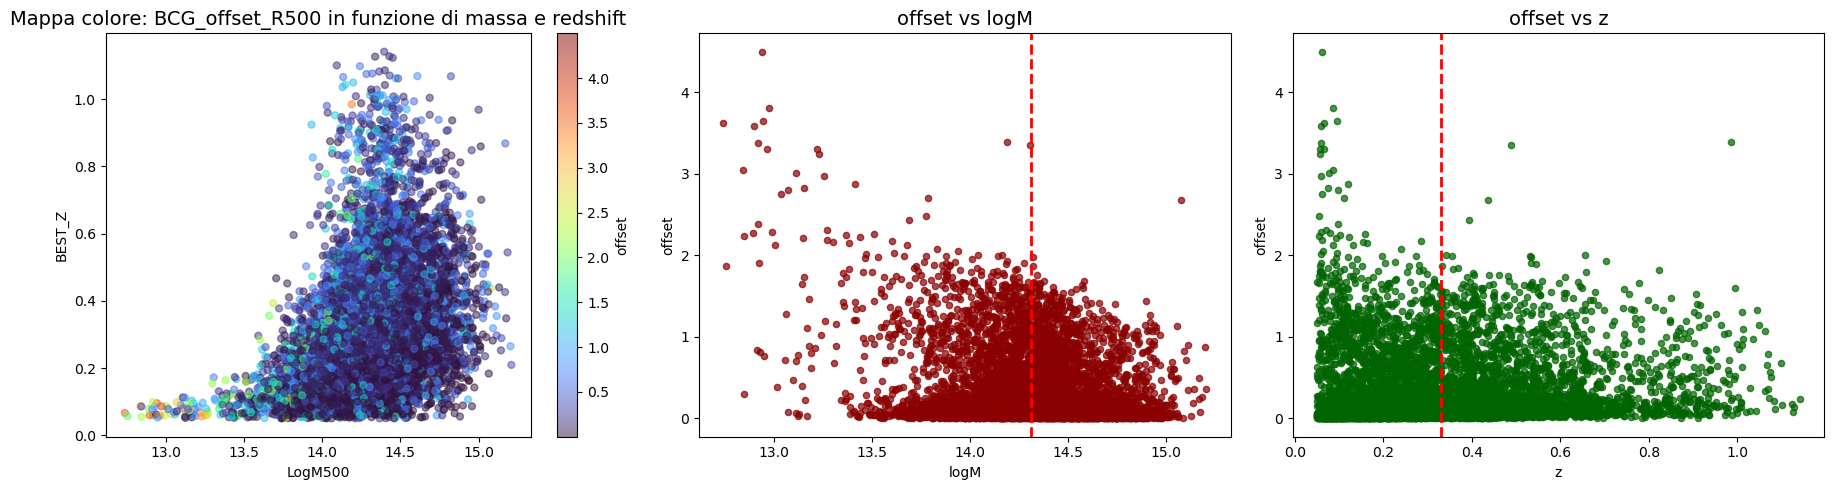

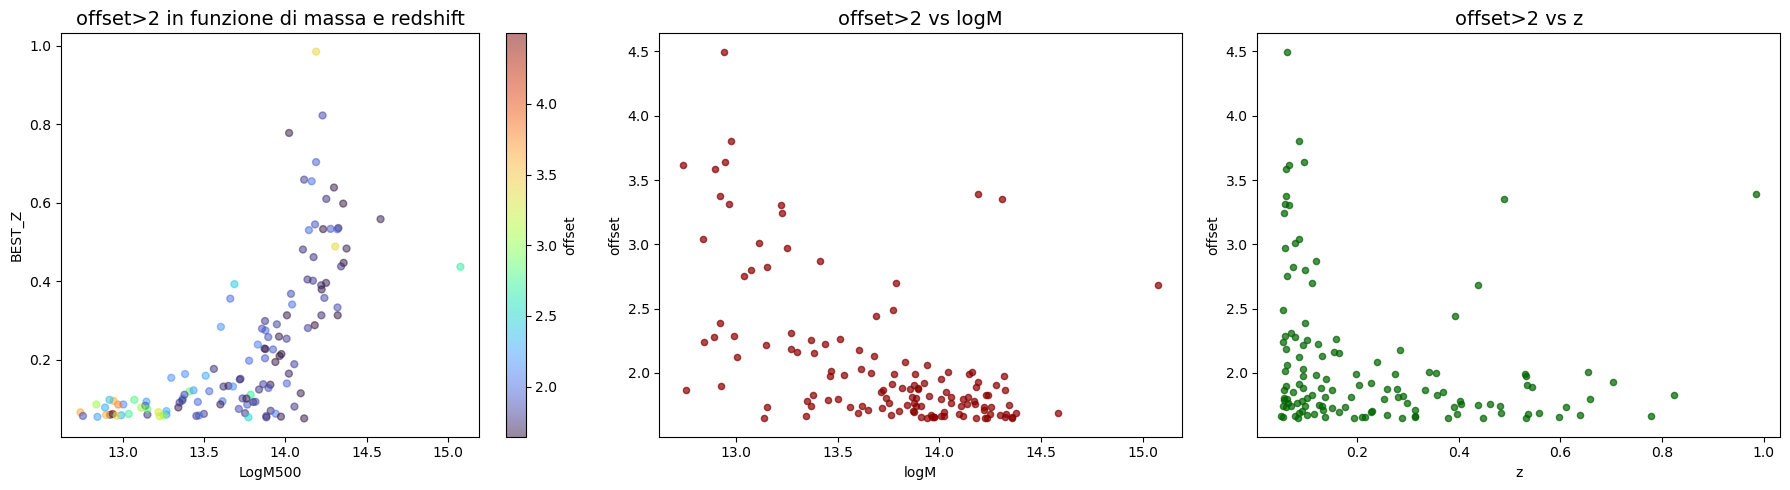

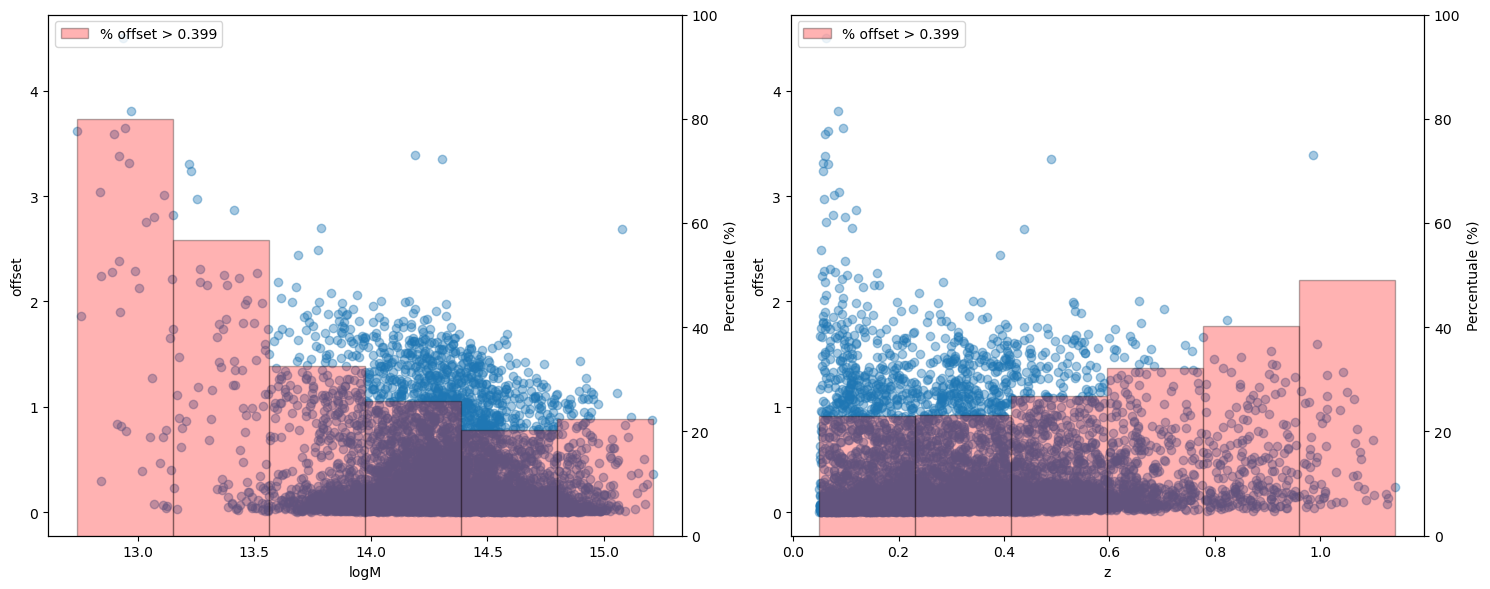

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # sempre per ottenere i plot affiancati

#ora faccio lo scatter plot per valutare la distribuzione dell'offset in funzione di logM e z
# offset vs massa e redshift
sc = axes[0].scatter(logM, z,c=offset,cmap="turbo",s=25,alpha=0.5)
axes[0].set_title("Mappa colore: BCG_offset_R500 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")


# Scatter plot dell'offset vs logM 
axes[1].scatter(logM, offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")
axes[1].axvline(x=14.315, color='red', linestyle='--', linewidth=2)

# Scatter plot dell'offset vs z 
axes[2].scatter(z, offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")
axes[2].axvline(x=0.331, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

mask = offset >= 1.640 # definisco una mask per filtrare i punti con offset "alto"
new_offset = offset[mask]
new_logM   = logM[mask]
new_z      = z[mask]

#eseguo i plot dei dati "filtrati"
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Scatter plot dell'offset vs LogM e z
sc = axes[0].scatter(new_logM, new_z,c=new_offset,cmap="turbo",s=25,alpha=0.5)

axes[0].set_title("offset>2 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")

# aggiungi la colorbar
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")

# Scatter plot dell'offset vs logM 
axes[1].scatter(new_logM, new_offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset>2 vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")

# Scatter plot dell'offset vs z 
axes[2].scatter(new_z, new_offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset>2 vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")


plt.tight_layout()
plt.show()


# --- Parametri ---
a = 0.399       # soglia su offset
logM_min = logM.min()
logM_max = logM.max()

def bins_width(data, nbins):
    max_data = data.max()
    min_data = data.min()
    width = (max_data-min_data)/nbins
    return width


wbinM = bins_width(logM,6.0)    # larghezza bin per logM
wbinZ = bins_width(z,6.0)        # larghezza bin per z

# Funzione che costruisce i bin senza uscire dal range
def build_bins(data, width):
    xmin = data.min()
    xmax = data.max()

    # Costruzione bin "interni" all'intervallo [xmin, xmax]
    bins = np.arange(xmin, xmax + width, width)

    # Assicura che l'ultimo bin non superi xmax
    if bins[-1] > xmax:
        bins[-1] = xmax
    
    return bins


# --- Funzione pannello (scatter + percentuali) ---
def make_panel(ax1, x_values, offset, xlabel, width):

    # scatter base
    ax1.scatter(x_values, offset, alpha=0.4)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("offset")

    # bin corretti per l'intervallo del campione
    bins = build_bins(x_values, width)

    # dataframe
    df = pd.DataFrame({"x": x_values, "offset": offset})
    df["bin"] = pd.cut(df["x"], bins=bins, right=False, include_lowest=True)

    # percentuali offset > a (senza warning)
    percentuali = df.groupby("bin", observed=True).apply(
        lambda g: 100 * np.mean(g["offset"] > a) if len(g) > 0 else np.nan,
        include_groups=False
    )

    # centri dei bin
    centri_bin = np.array([interval.left + (interval.right - interval.left)/2
                           for interval in percentuali.index])

    # asse gemello per istogramma
    ax2 = ax1.twinx()
    ax2.bar(
        centri_bin,
        percentuali.values,
        width=width,
        alpha=0.3,
        color="red",
        edgecolor="black",
        label=f"% offset > {a}"
    )
    ax2.set_ylabel("Percentuale (%)")
    ax2.set_ylim(0, 100)

    # legenda combinata
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")


# --- FIGURA CON DUE PANNELLI AFFIANCATI ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# pannello 1: logM con wbin
make_panel(axes[0], logM, offset, "logM", wbinM)

# pannello 2: z con b
make_panel(axes[1], z, offset, "z", wbinZ)

plt.tight_layout()
plt.show()


### $Distribuzione$ $dell'offset$ $in$ $relazione$ $a$ $logM$ $e$ $redshift$

<div style="">
<p>
    
$\text{Nella prima fila di grafici, troviamo, in ordine da sinistra verso destra:                          }$

$\text{-Plot dell'offset in funzione di LogM e del redshift, dove il valore dell'offset viene rappresentato dalla}$
$\text{scala di colori}$

$\text{-Plot dell'offset in funzione di logM}$

$\text{-Plot dell'offset in funzione del redshift.}$

$\text{La seconda fila mostra invece gli stessi grafici ma solo per i punti con offset > di ??.}$

$\text{Si osserva, che i campioni con offset vicino al massimo osservato, sembrano avere valori di logM e redshift }$
$\text{relativamente piccoli.}$ 

$\text{Per approfondire questa osservazione vengono presentati gli ultimi due grafici. Essi rappresentano:}$
$\text{il plot dell'offset in funzione di LogM e redshift rispettivamente, ad essi, viene però sovrapposto un}$
$\text{istogramma. quest'ultimo è costruito calcolando la porzione di punti con un offset maggiore della media}$
 $\text{nel dato intervallo. Grazie alle lughezze relative tra le barre, possiamo quindi visualizzare meglio le possibili correlazioni}$
$\text{tra l'offset e gli altri valori. Notiamo che la concentrazione dei punti con offset superiore alla }$
   
$\text{media decresce con l'aumentare di logM. Mentre aumenta con l'aumentare del'redshift.}$

</p>
</div>